In [1]:
%%html
<style>
table {float:left}
</style>

### Data Dictionary

|Variable|Definition|Key|
|--------|----------|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings /spouses aboard Titanic||
|parch|# of patents / children aboard Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown,S = Southhamption|

### Variables Notes
**pclass**: A proxy for socio-economic status (SES), where 1st = Upper, 2nd = Middle, and 3rd = Lower.

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: Parent = mother, father, Child = daughter, son, stepdaughter, stepson, Some children travelled only with a nanny, therefore parch=0 for them.

### Titanic Deck Layout

![Titanic Layout](Img/titanic_layout.png)

![Titanic Cutaway](Img/titanic_cutaway.png)

### Load Training Data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath = "Data/train.csv"
titanic = pd.read_csv(filepath)

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Summary

In [6]:
titanic.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Data

In [5]:
titanic.isnull().sum()/len(titanic) * 100 #Percentage missing data

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Survival Rate of Passengers with Cabin Data

In [74]:
yes_cabin = titanic[titanic.Cabin.notnull()].Survived.sum()/len(titanic[titanic.Cabin.notnull()])
all_cabin = titanic.Survived.sum()/len(titanic)
print("The percentage of passengers with cabins numbers who survived is ", yes_cabin, "compared to the training set rate of overall survival of ", all_cabin)

The percentage of passengers with cabins numbers who survived is  0.6666666666666666 compared to the training set rate of overall survival of  0.3838383838383838


### Survival Rate of Passengers with Age Data

In [77]:
yes_age = titanic[titanic.Age.notnull()].Survived.sum()/len(titanic[titanic.Age.notnull()])
all_age = titanic.Survived.sum()/len(titanic)
print("The percentage of passengers with age data who survived is ", yes_age, "compared to the training set rate of overall survival of ", all_age)

The percentage of passengers with age data who survived is  0.4061624649859944 compared to the training set rate of overall survival of  0.3838383838383838


### Emprical Distributions

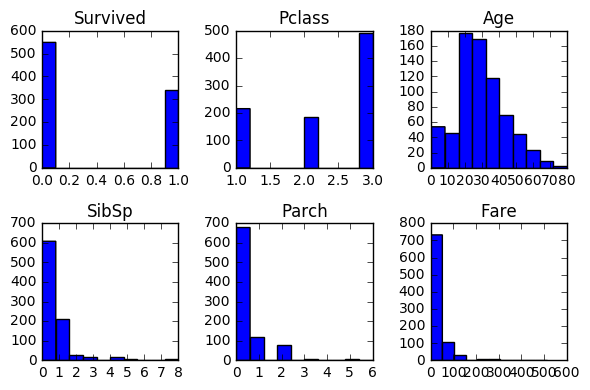

In [29]:
f, axarr = plt.subplots(2, 3)
axarr[0, 0].hist(titanic["Survived"])
axarr[0, 0].set_title('Survived')
axarr[0, 1].hist(titanic["Pclass"])
axarr[0, 1].set_title('Pclass')
axarr[0, 2].hist(titanic[titanic.Age.notnull()].Age) #histrogram of non-null age values
axarr[0, 2].set_title('Age')
axarr[1, 0].hist(titanic["SibSp"])
axarr[1, 0].set_title('SibSp')
axarr[1, 1].hist(titanic["Parch"])
axarr[1, 1].set_title('Parch')
axarr[1, 2].hist(titanic["Fare"])
axarr[1, 2].set_title('Fare')
f.tight_layout()
f

### Correlation Matrices and Heatmaps

In [30]:
titanic.corr(method='pearson') #Pearson correlation (linear)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


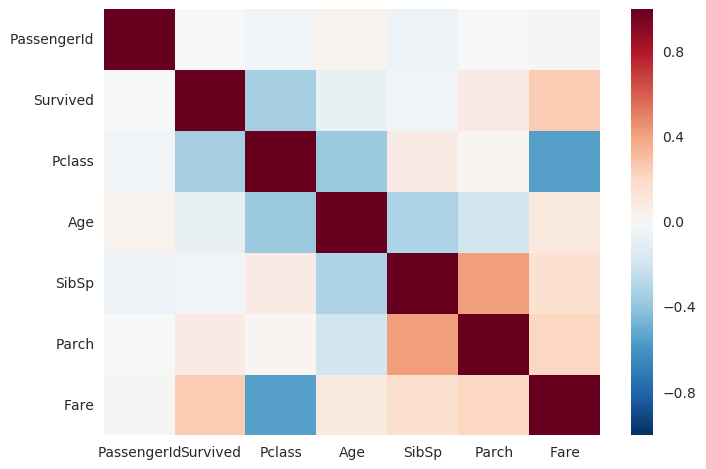

In [43]:
# calculate the Pearson correlation matrix
corr = titanic.corr(method='pearson')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
sns.plt.show()

In [31]:
titanic.corr(method='kendall') # Kendall rank correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.004090,-0.026824,0.027542,-0.048394,0.000798,-0.008921
Survived,-0.004090,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.026824,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Age,0.027542,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,-0.048394,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
Parch,0.000798,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
Fare,-0.008921,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


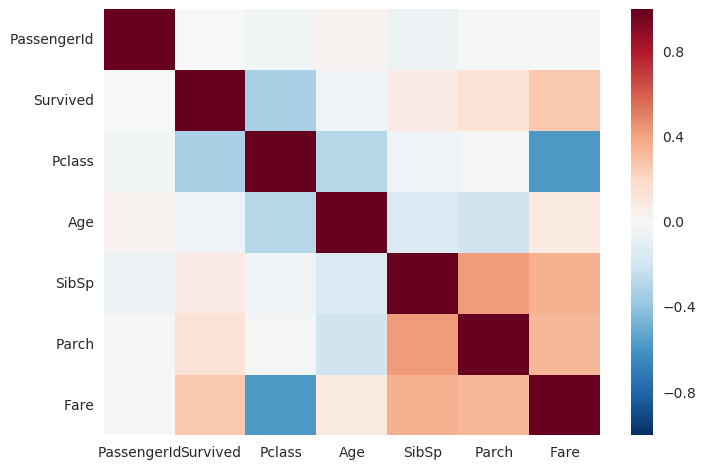

In [42]:
# calculate the Kendall correlation matrix
corr = titanic.corr(method='kendall')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
sns.plt.show()

### Boxplots

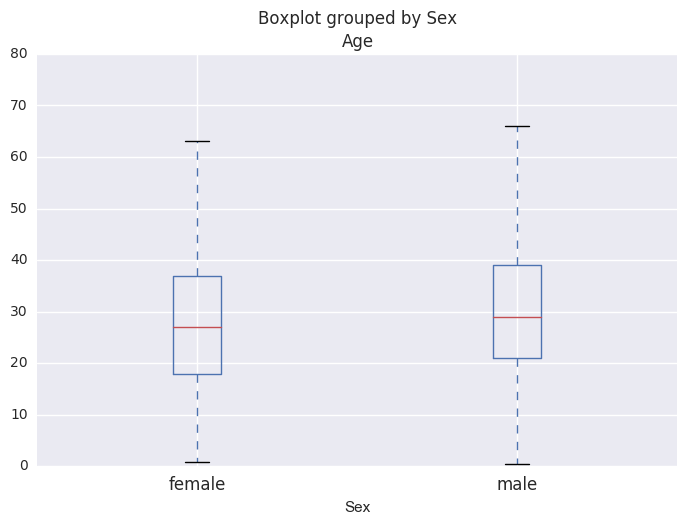

In [46]:
titanic.boxplot("Age", by ="Sex")
plt.show()

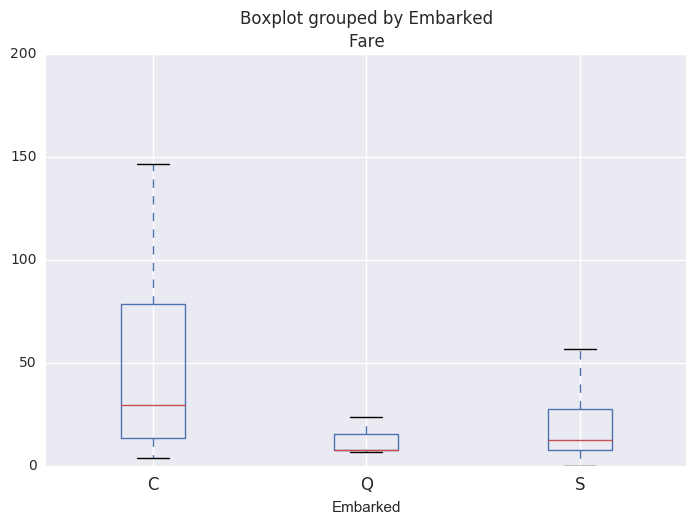

In [56]:
titanic.boxplot("Fare", by ="Embarked", sym ="+")
plt.ylim(0,200)
plt.show()

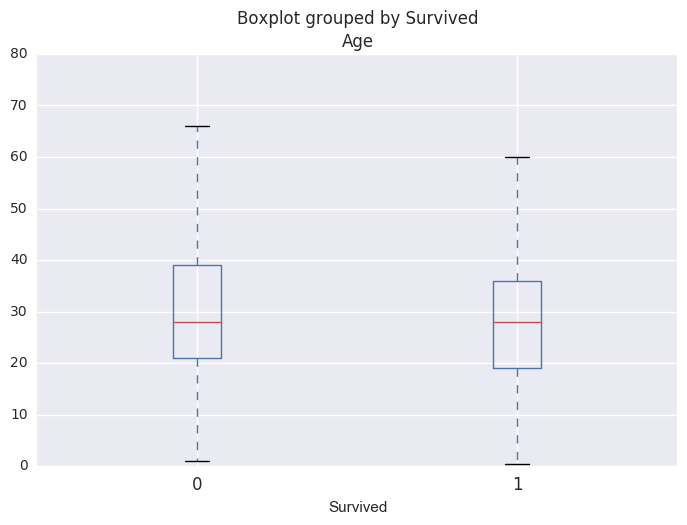

In [57]:
titanic.boxplot("Age", by ="Survived")
plt.show()

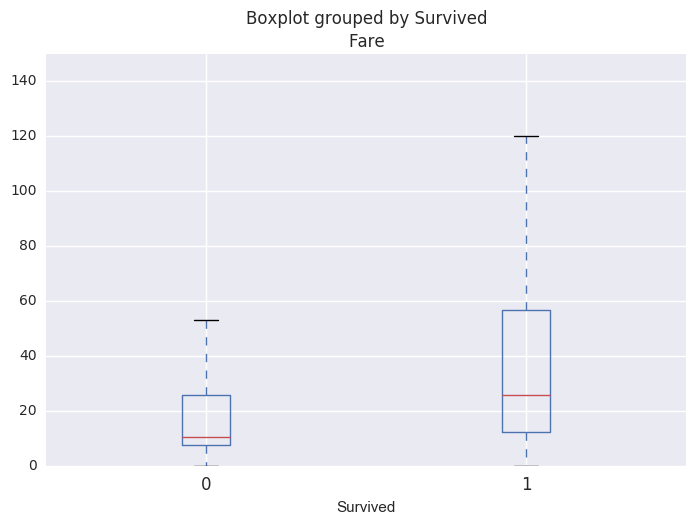

In [62]:
titanic.boxplot("Fare", by ="Survived")
plt.ylim(0,150)
plt.show()